In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Statistical Tests
import scipy.stats as stats
import viz_kmeans
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs
from scipy.stats import norm

np.set_printoptions(suppress=True)


# Visualizing
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.dates as dates
import seaborn as sns
from sklearn.model_selection import learning_curve
import datetime

pd.options.display.float_format = '{:20,.2f}'.format

import env

from wrangle import clean_zillow, missing_zero_values_table, features_missing, handle_missing_values, get_zillow_data, split, seperate_y, scale_data, split_seperate_scale 

import explore

In [2]:
df = pd.read_csv("zillowcluster_df.csv")
df = clean_zillow(df)

In [3]:
df.head()

,heatingorsystemtypeid,airconditioningtypeid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,poolcnt,...,age_bin,baths_per_sqft,taxrate,acres,acres_bin,sqft_bin,bath_bed_ratio,la_county,orange_county,ventura_county
parcelid,,,,,,,,,,,,,,,,,,,,,
10711855,2.00,5.00,2.00,3.00,"2,107.00",6037,34.22,-118.62,"9,158.00",1.00,...,0.33,0.00,1.23,0.21,0.30,0.50,0.67,1,0,0
10711877,2.00,1.00,2.00,4.00,"1,882.00",6037,34.22,-118.62,"9,035.00",1.00,...,0.33,0.00,1.23,0.21,0.30,0.40,0.50,1,0,0
10711888,2.00,1.00,2.00,4.00,"1,882.00",6037,34.22,-118.62,"9,800.00",0.00,...,0.33,0.00,1.23,0.22,0.30,0.40,0.50,1,0,0
10711910,2.00,5.00,2.00,3.00,"1,477.00",6037,34.22,-118.62,"11,285.00",1.00,...,0.47,0.00,1.43,0.26,0.30,0.30,0.67,1,0,0
10711923,2.00,5.00,2.00,4.00,"1,918.00",6037,34.22,-118.62,"11,239.00",1.00,...,0.47,0.00,1.26,0.26,0.30,0.40,0.50,1,0,0


In [4]:
missing_zero_values_table(df)

Your selected dataframe has 30 columns and 63987 Rows.
There are 0 columns that have NULL values.


,Zero Values,null_count,% of Total Values,Total Zeroes + Null Values,% Total Zero + Null Values,Data Type
heatingorsystemtypeid,0,0,0.00,0,0.00,float64
airconditioningtypeid,0,0,0.00,0,0.00,float64
orange_county,44075,0,0.00,44075,68.90,uint8
la_county,25696,0,0.00,25696,40.20,uint8
bath_bed_ratio,0,0,0.00,0,0.00,float64
sqft_bin,2448,0,0.00,2448,3.80,float64
acres_bin,7695,0,0.00,7695,12.00,float64
acres,0,0,0.00,0,0.00,float64
taxrate,0,0,0.00,0,0.00,float64
baths_per_sqft,52,0,0.00,52,0.10,float64


In [5]:
train, validate, test = split(df)

In [6]:
X_train, y_train, X_validate, y_validate, X_test, y_test = seperate_y(train, validate, test)

In [7]:
train_scaled, validate_scaled, test_scaled = scale_data(train, validate, test)

In [8]:
num_d = train.select_dtypes(exclude=['object', 'uint8', 'datetime64[ns]'])

In [9]:

quant_vars = list(num_d.columns.values)

In [10]:
quant_vars

['heatingorsystemtypeid',
 'airconditioningtypeid',
 'bathroomcnt',
 'bedroomcnt',
 'calculatedfinishedsquarefeet',
 'latitude',
 'longitude',
 'lotsizesquarefeet',
 'poolcnt',
 'roomcnt',
 'fireplaceflag',
 'taxvaluedollarcnt',
 'taxamount',
 'logerror',
 'age_of_home',
 'age_bin',
 'baths_per_sqft',
 'taxrate',
 'acres',
 'acres_bin',
 'sqft_bin',
 'bath_bed_ratio']

In [11]:
def heat_map(train):
    plt.figure(figsize=(22,14))
    q = sns.heatmap(df.corr(), cmap='RdYlBu', annot=True, center=0)
    return q

In [12]:
def pair_plot(df):
    p = sns.pairplot(df)
    return p

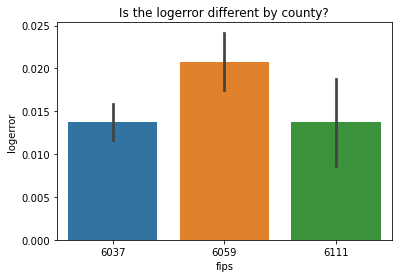

In [13]:

sns.barplot(data = train, x = 'fips', y = 'logerror')
plt.title("Is the logerror different by county?")
plt.show()

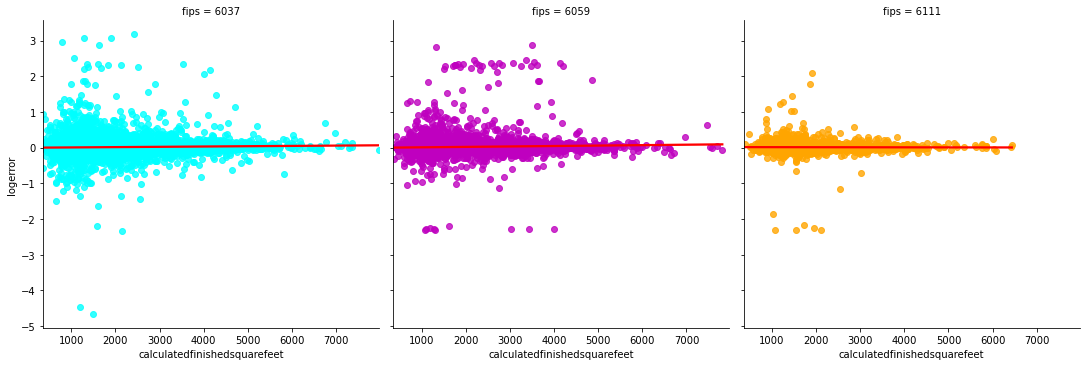

In [14]:

sns.lmplot(x='calculatedfinishedsquarefeet', y='logerror', col='fips', data=train, fit_reg=True, hue='fips', palette=dict({6037:"cyan", 6059:"m", 6111:"orange"}), line_kws={'color': 'red'})


plt.show()



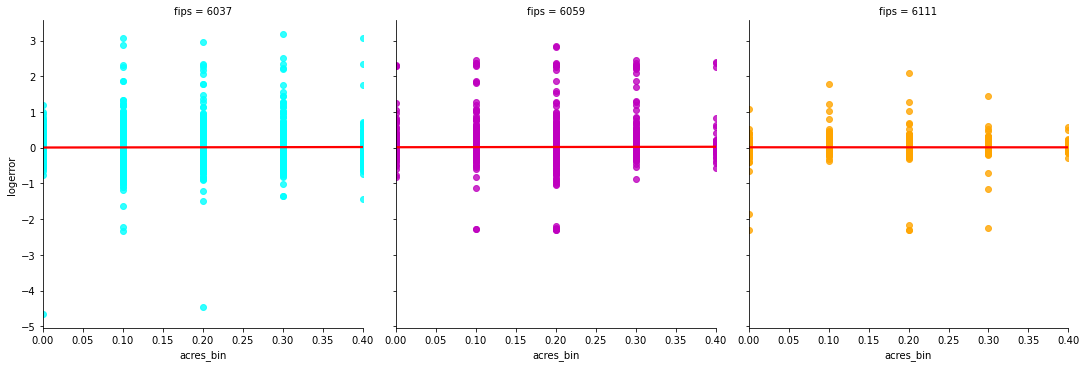

In [15]:
sns.lmplot(x='acres_bin', y='logerror', col='fips', data=train, fit_reg=True, hue='fips', palette=dict({6037:"cyan", 6059:"m", 6111:"orange"}), line_kws={'color': 'red'})


plt.show()


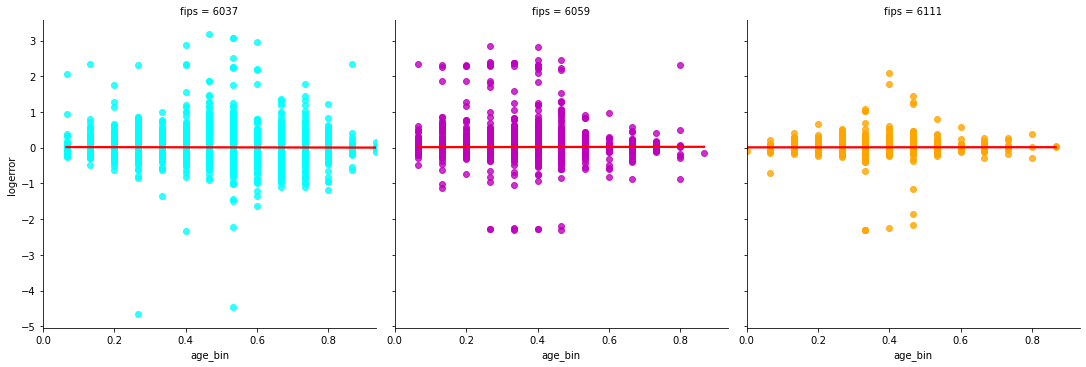

In [16]:
sns.lmplot(x='age_bin', y='logerror', col='fips', data=train, fit_reg=True, hue='fips', palette=dict({6037:"cyan", 6059:"m", 6111:"orange"}), line_kws={'color': 'red'})


plt.show()

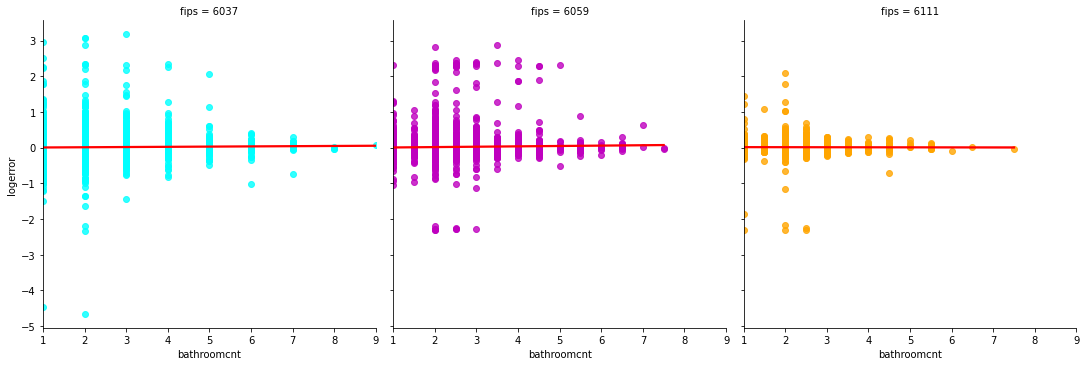

In [17]:
sns.lmplot(x='bathroomcnt', y='logerror', col='fips', data=train, fit_reg=True, hue='fips', palette=dict({6037:"cyan", 6059:"m", 6111:"orange"}), line_kws={'color': 'red'})


plt.show()

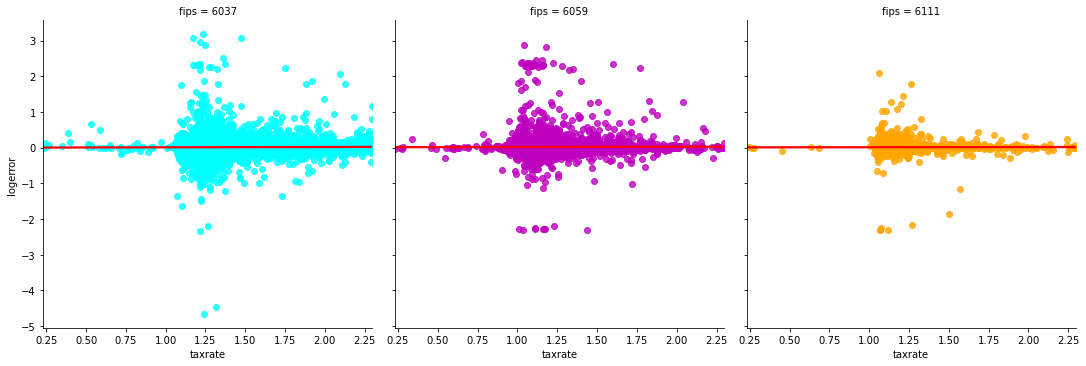

In [18]:
sns.lmplot(x='taxrate', y='logerror', col='fips', data=train, fit_reg=True, hue='fips', palette=dict({6037:"cyan", 6059:"m", 6111:"orange"}), line_kws={'color': 'red'})


plt.show()

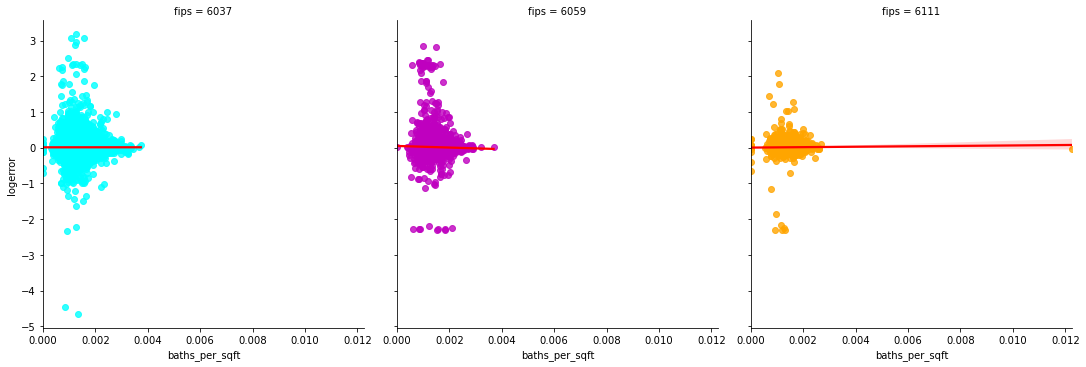

In [19]:
sns.lmplot(x='baths_per_sqft', y='logerror', col='fips', data=train, fit_reg=True, hue='fips', palette=dict({6037:"cyan", 6059:"m", 6111:"orange"}), line_kws={'color': 'red'})


plt.show()

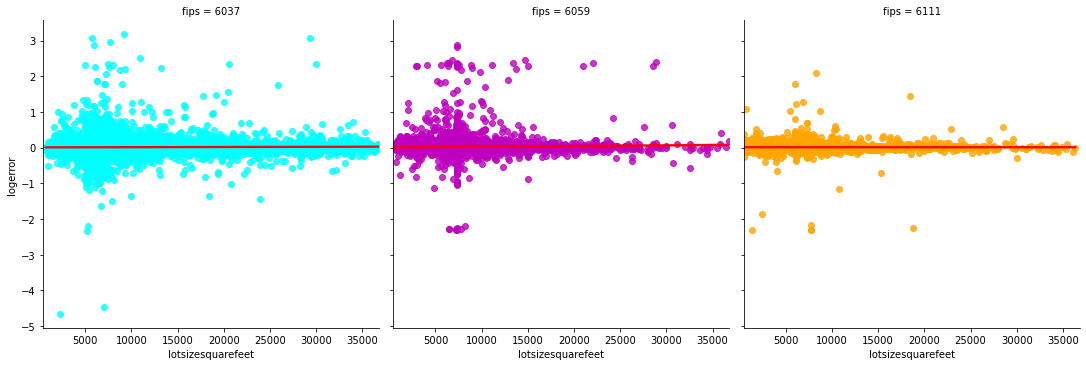

In [20]:
sns.lmplot(x='lotsizesquarefeet', y='logerror', col='fips', data=train, fit_reg=True, hue='fips', palette=dict({6037:"cyan", 6059:"m", 6111:"orange"}), line_kws={'color': 'red'})


plt.show()

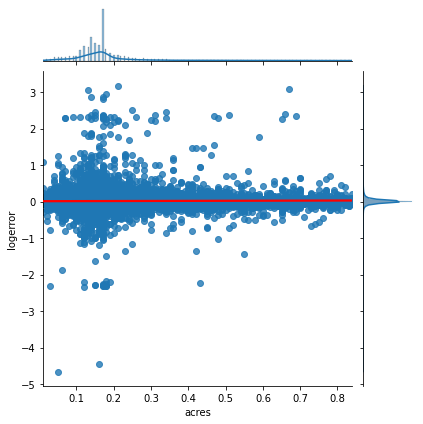

In [21]:

logroom = sns.jointplot(x="acres", y="logerror", data=train, kind='reg')
regline = logroom.ax_joint.get_lines()[0]
regline.set_color('red')
regline.set_zorder(5)

acreage seems to create a higher positive log error as it increases but there are some outliers that could be affecting this

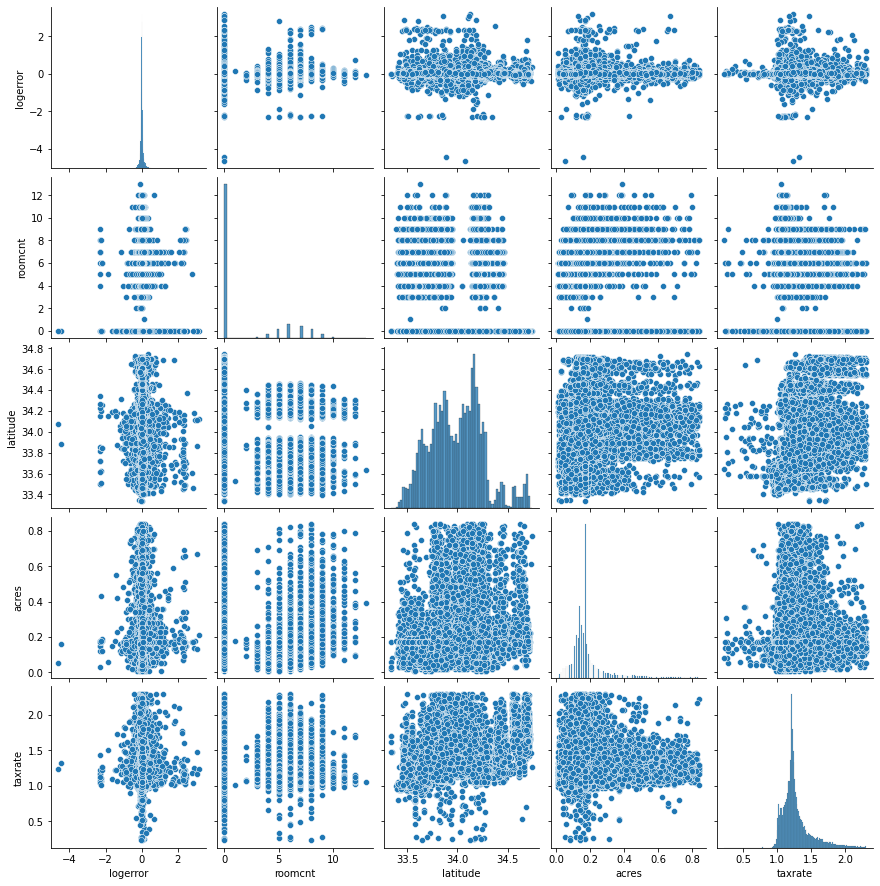

In [22]:
sns.pairplot(data=train[['logerror','roomcnt','latitude', 'acres', 'taxrate']], corner=False )

<AxesSubplot:ylabel='acres'>

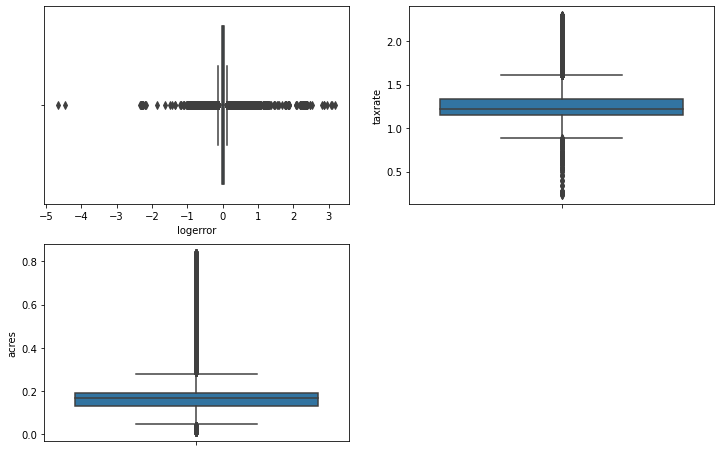

In [38]:
# visualize outliers using boxplots:

plt.figure(figsize = (12,8))
plt.subplot(221)
sns.boxplot(x = train.logerror)

plt.subplot(222)
sns.boxplot(y = train.taxrate)

plt.subplot(223)
sns.boxplot(y = train.acres)

Lot of outliers with acreage and taxrate. Probably needs to be handled

In [24]:
# Calculate q1, q3 and iqr for income

q1 = df.acres.quantile(0.25)
q3 = df.acres.quantile(0.75)
iqr = q3 - q1
k = 3.0

# calculate upper and lower ranges
upper_bound_income =  q3 + k * iqr
lower_bound_income =  q1 - k * iqr

upper_bound_income

0.37

In [25]:
df.acres.median()

0.17

In [26]:
# Calculate q1, q3 and iqr for income

q1 = df.taxrate.quantile(0.25)
q3 = df.taxrate.quantile(0.75)
iqr = q3 - q1
k = 3.0

# calculate upper and lower ranges
upper_bound_income =  q3 + k * iqr
lower_bound_income =  q1 - k * iqr

upper_bound_income

1.8777670393819368

count              35,832.00
mean                    0.02
std                     0.16
min                    -4.66
25%                    -0.02
50%                     0.01
75%                     0.04
max                     3.18
Name: logerror, dtype: float64


<AxesSubplot:>

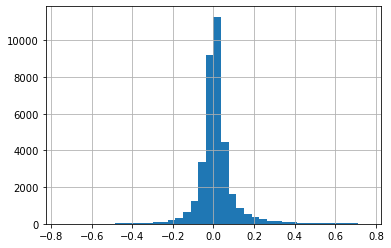

In [37]:

# Look at the distribution of the target variable (log-error)
print(train['logerror'].describe())
train.loc[abs(train['logerror']) < .75, 'logerror'].hist(bins=40)

the distribution of the log error looks fairly normal. There appears to be some outliers around .6.

In [28]:

X = train[['calculatedfinishedsquarefeet', 'latitude']]


X.head()

,calculatedfinishedsquarefeet,latitude
parcelid,,
13853852,"1,231.00",33.92
14065017,"2,615.00",33.70
10854047,"1,500.00",34.16
12883861,920.00,34.06
10913577,"2,085.00",34.15


In [30]:
scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])


X_scaled.head()


,calculatedfinishedsquarefeet,latitude
13853852,-0.65,-0.27
14065017,1.05,-1.09
10854047,-0.32,0.64
12883861,-1.03,0.27
10913577,0.40,0.59


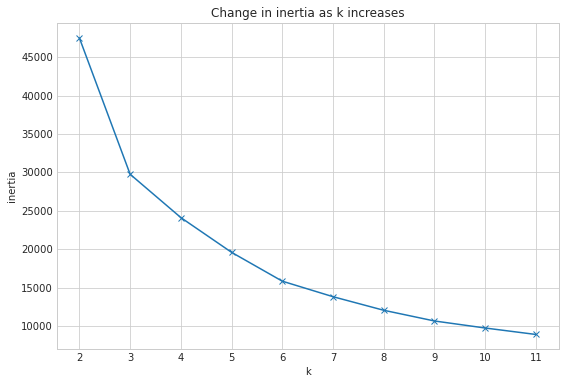

In [31]:

#plot inertia vs k to choose k
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [32]:
k =4 

kmeans = KMeans(n_clusters= k)
kmeans.fit(X_scaled)
kmeans.inertia_

24110.203078429688

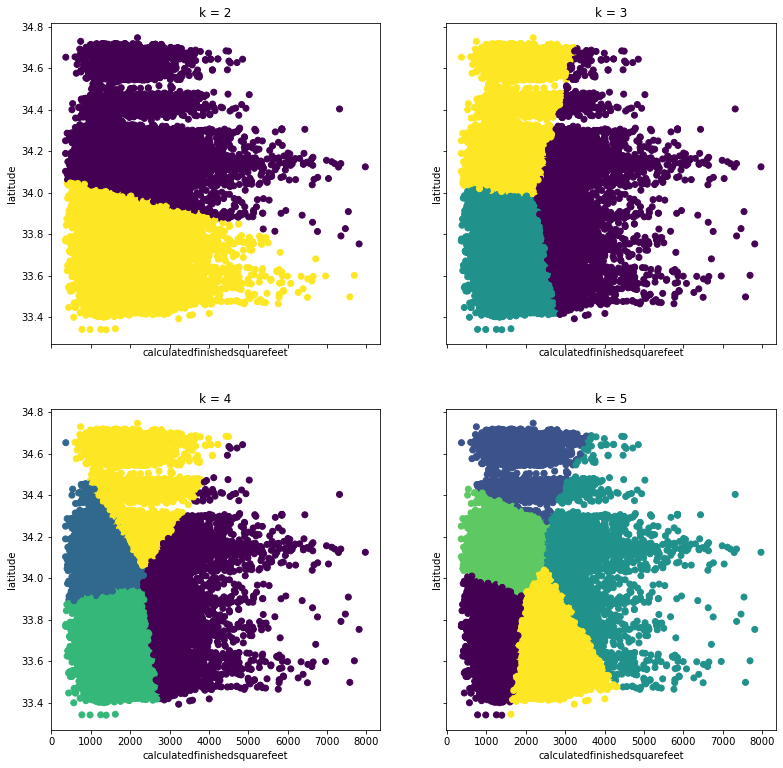

In [35]:

# What value of k is appropriate?

fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X_scaled).predict(X_scaled)
    ax.scatter(X.calculatedfinishedsquarefeet, X.latitude, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='calculatedfinishedsquarefeet', ylabel='latitude')

<AxesSubplot:>

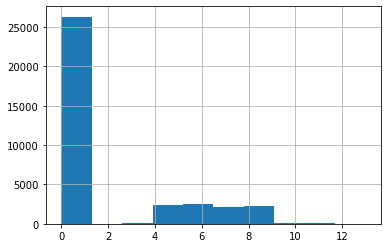

In [39]:
train.roomcnt.hist()

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63987 entries, 10711855 to 167688532
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   heatingorsystemtypeid         63987 non-null  float64       
 1   airconditioningtypeid         63987 non-null  float64       
 2   bathroomcnt                   63987 non-null  float64       
 3   bedroomcnt                    63987 non-null  float64       
 4   calculatedfinishedsquarefeet  63987 non-null  float64       
 5   fips                          63987 non-null  object        
 6   latitude                      63987 non-null  float64       
 7   longitude                     63987 non-null  float64       
 8   lotsizesquarefeet             63987 non-null  float64       
 9   poolcnt                       63987 non-null  float64       
 10  roomcnt                       63987 non-null  float64       
 11  yearbuilt        

###### 